#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#**Load data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (1).csv


In [ ]:
df= pd.read_csv('/content/car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#**Data Exploration**

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.shape

(301, 9)

# **Data modification**

In [ ]:
# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = 2023-df['Year']
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Car_age          0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [ ]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
Car_age           16
dtype: int64

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_age'],
      dtype='object')

# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Selling Price Vs Car Age')

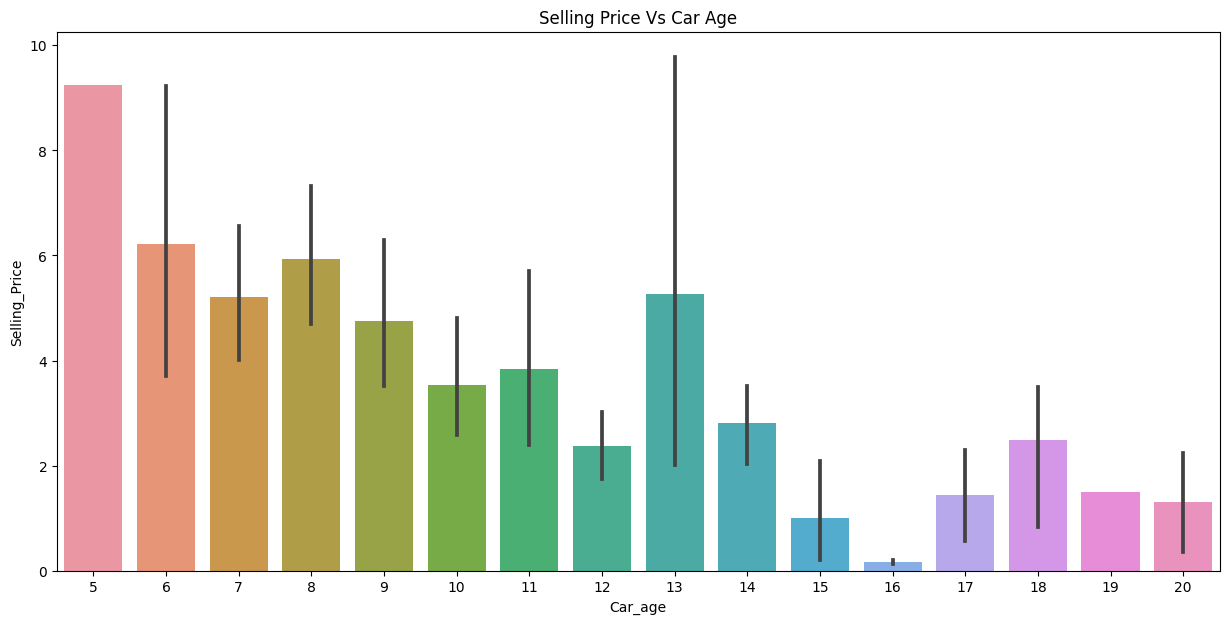

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

Observations:

Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old

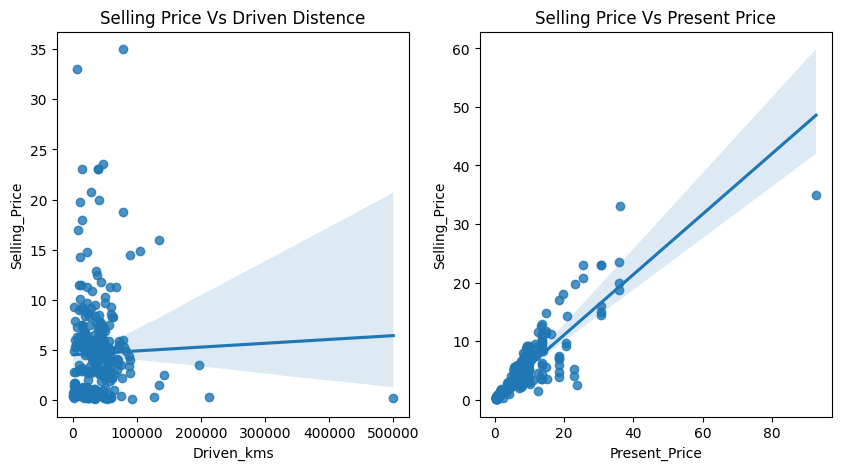

In [ ]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

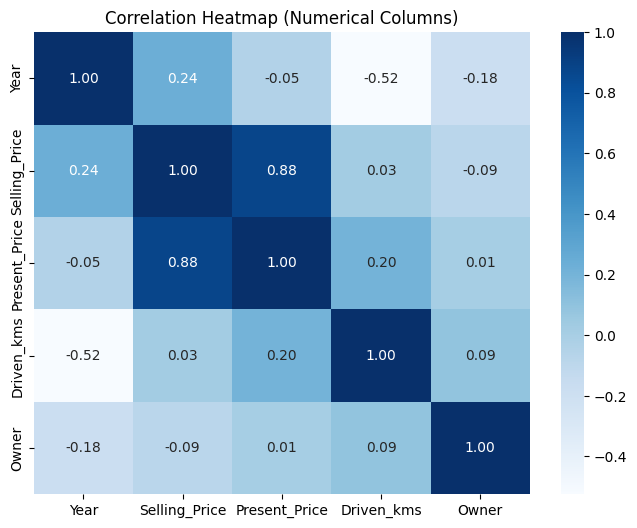

In [ ]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

In [ ]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


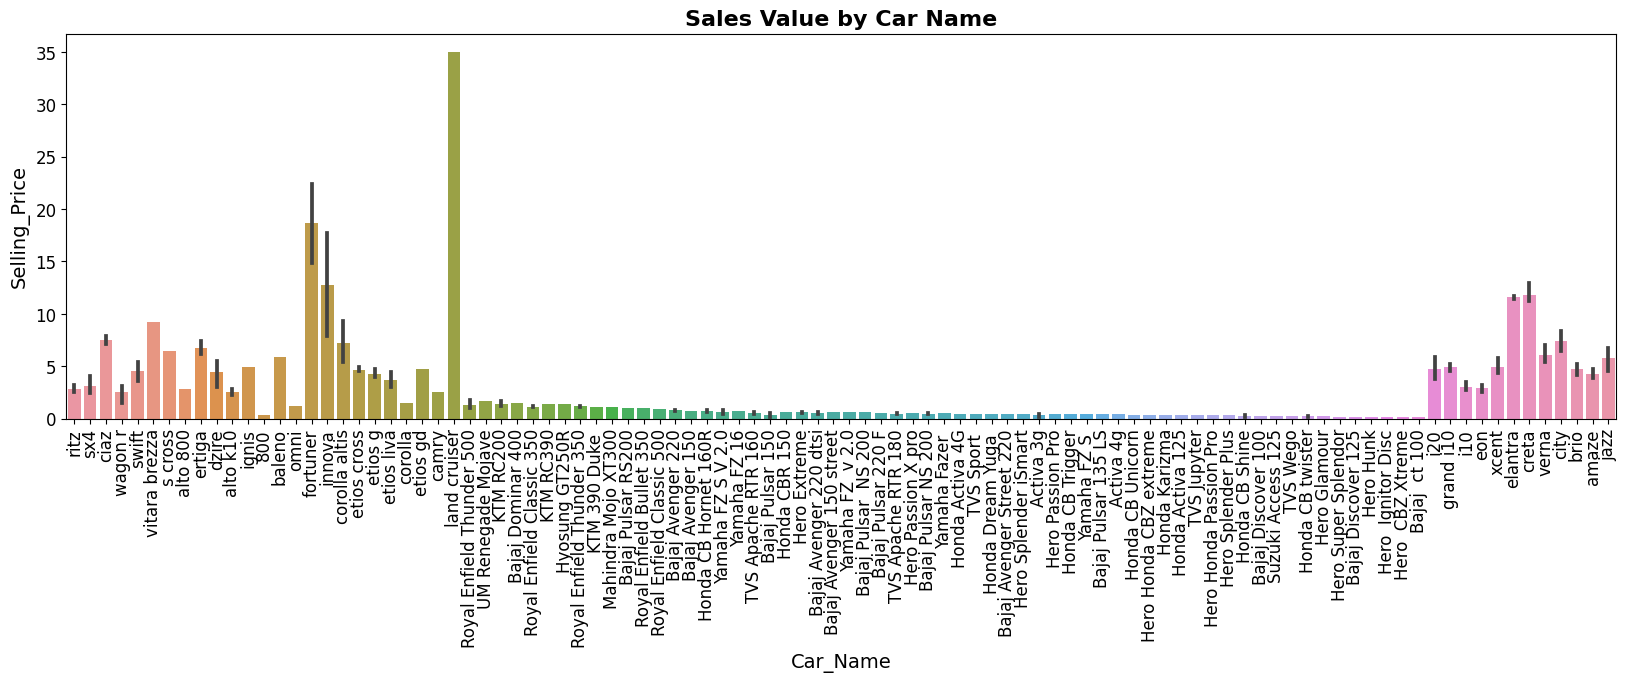

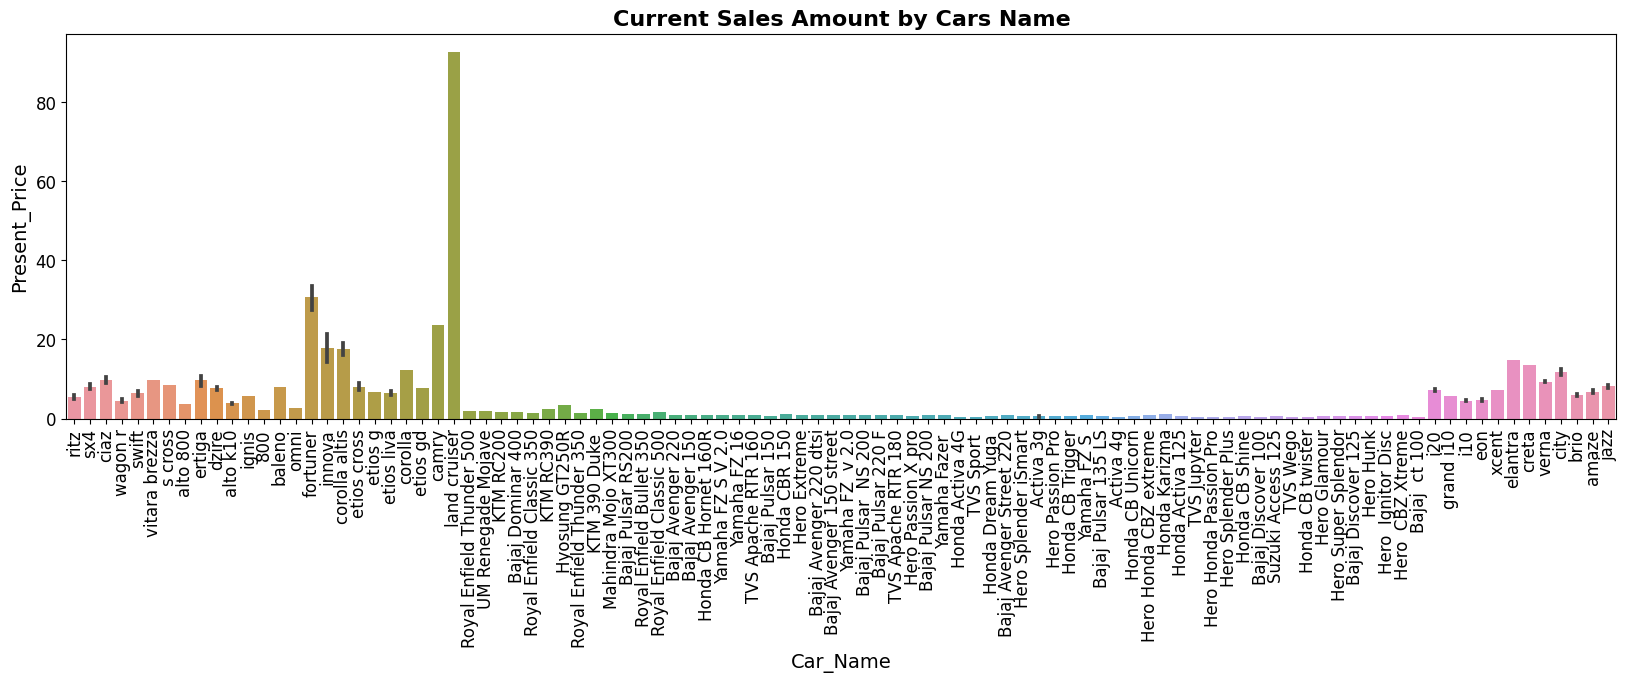

In [ ]:
def plot_bar(x,y,title):
    plt.figure(figsize=(20,5))
    sns.barplot(x=df[x], y=df[y])
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()

plot_bar('Car_Name','Selling_Price','Sales Value by Car Name')
plot_bar('Car_Name','Present_Price','Current Sales Amount by Cars Name')

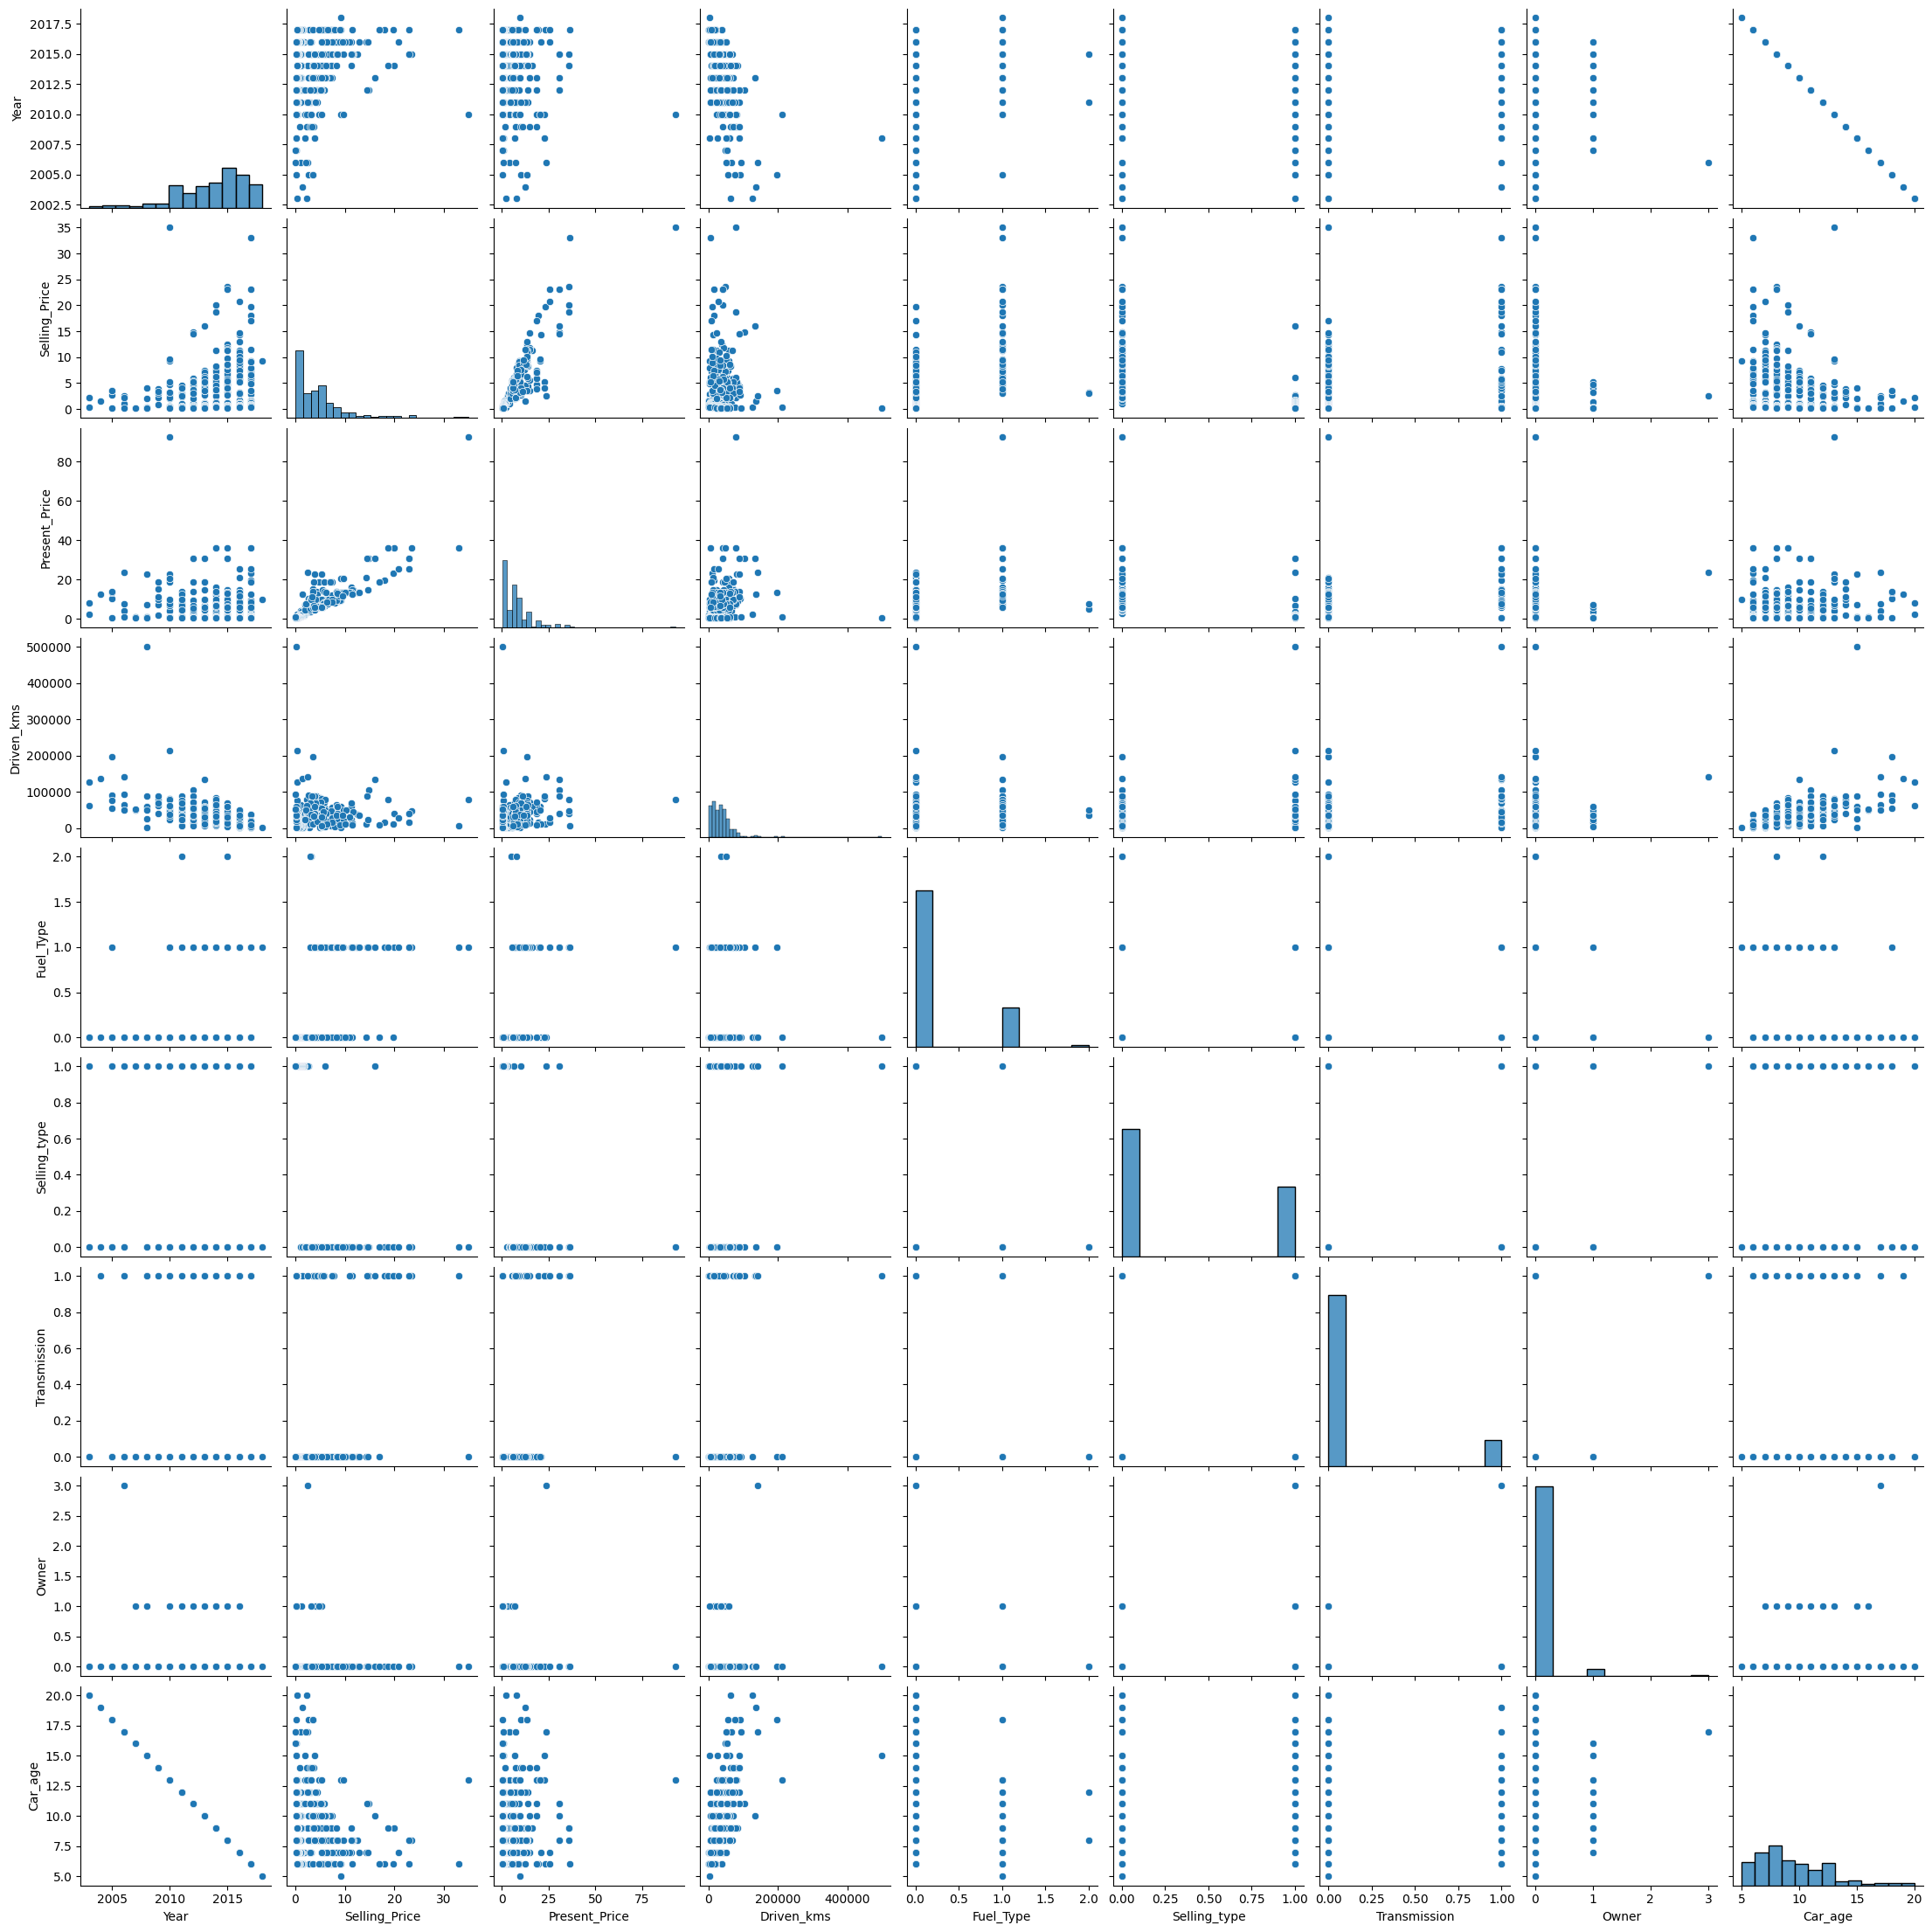

In [ ]:
sns.pairplot(df)
plt.show()

# **Data Encoding**

In [ ]:
#Encoding the Categorical Data

# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0,7
297,brio,2015,4.00,5.90,60000,0,0,0,0,8
298,city,2009,3.35,11.00,87934,0,0,0,0,14
299,city,2017,11.50,12.50,9000,1,0,0,0,6


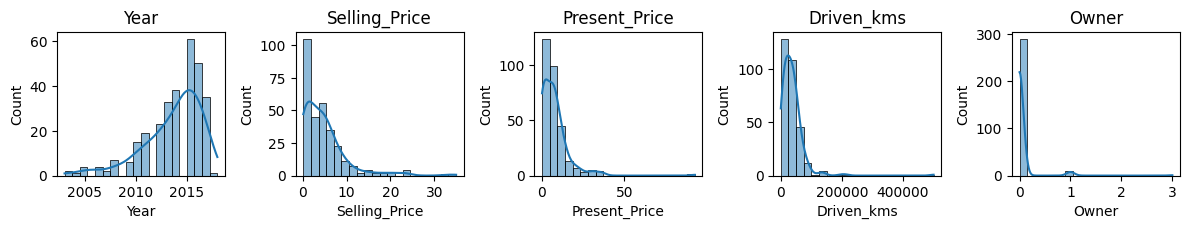

In [ ]:
# Distribution of Numerical Features
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

plt.figure(figsize=(12, 6))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car_age'],
      dtype='object')

# **Feature Scaling**

In [ ]:


# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df[['Present_Price','Car_age']])
input_scaled = scaler.transform(df[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

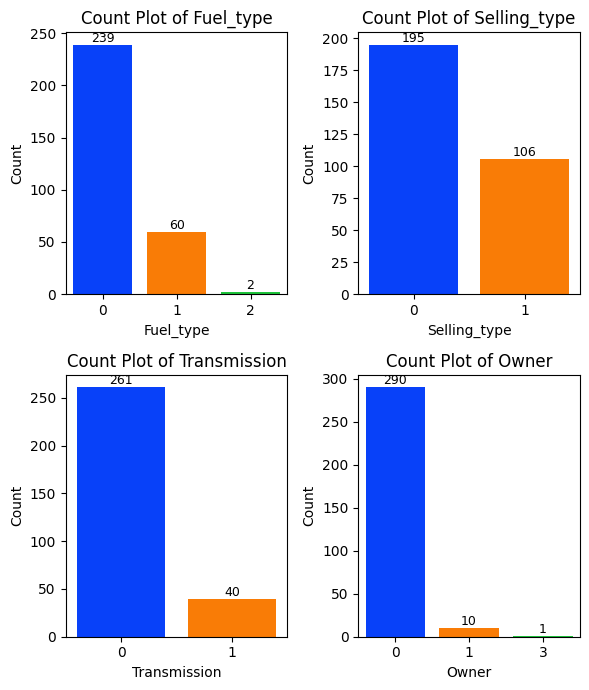

In [ ]:
# Define the list of categorical columns to analyze
categorical_columns = [ 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,7))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=9)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

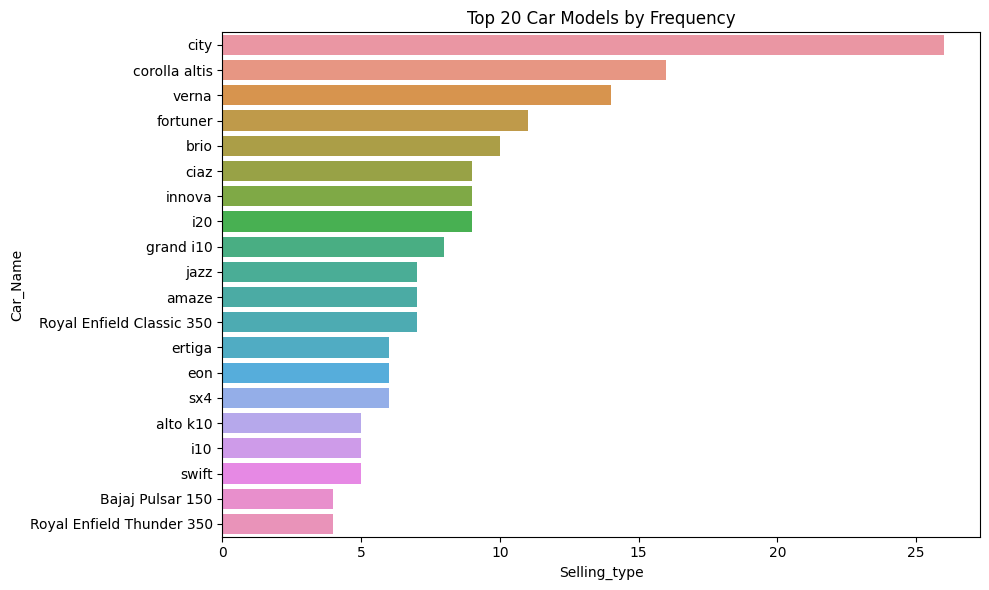

In [ ]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Selling_type')
plt.ylabel('Car_Name')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,2014,5.59,27000,0,0,0,0,9
1,2013,9.54,43000,1,0,0,0,10
2,2017,9.85,6900,0,0,0,0,6
3,2011,4.15,5200,0,0,0,0,12
4,2014,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0,7
297,2015,5.90,60000,0,0,0,0,8
298,2009,11.00,87934,0,0,0,0,14
299,2017,12.50,9000,1,0,0,0,6


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

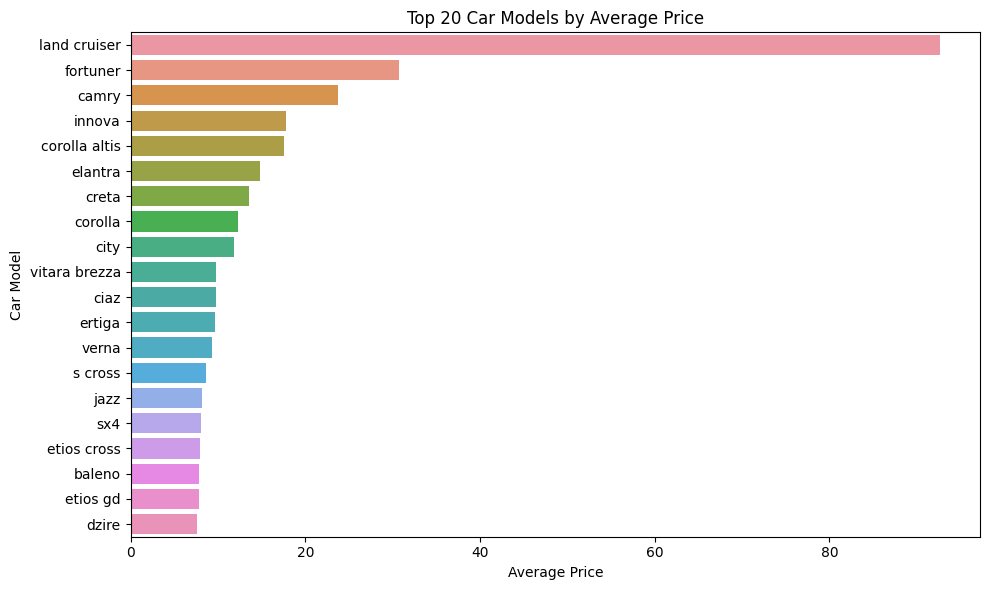

In [ ]:
 #Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

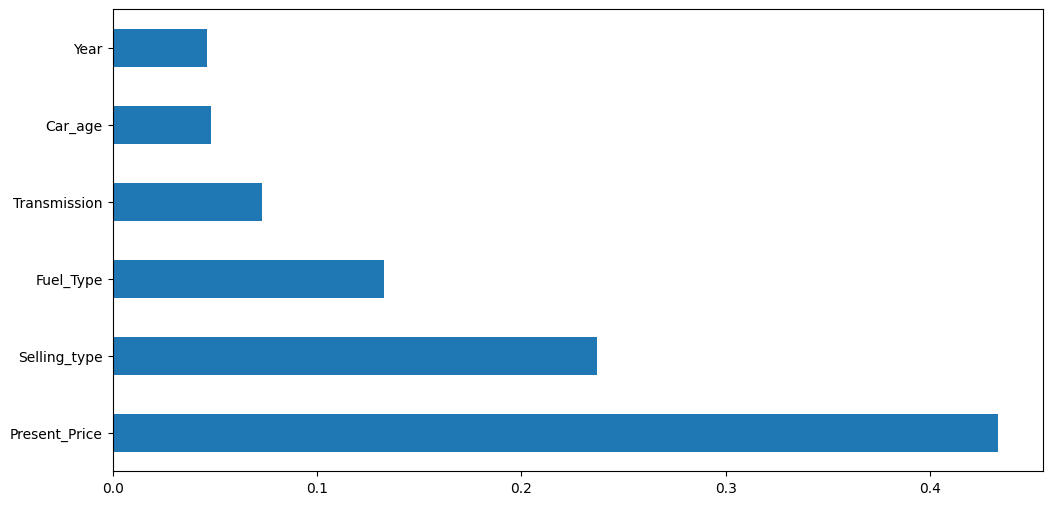

In [ ]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,Y)
ExtraTreesRegressor()
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

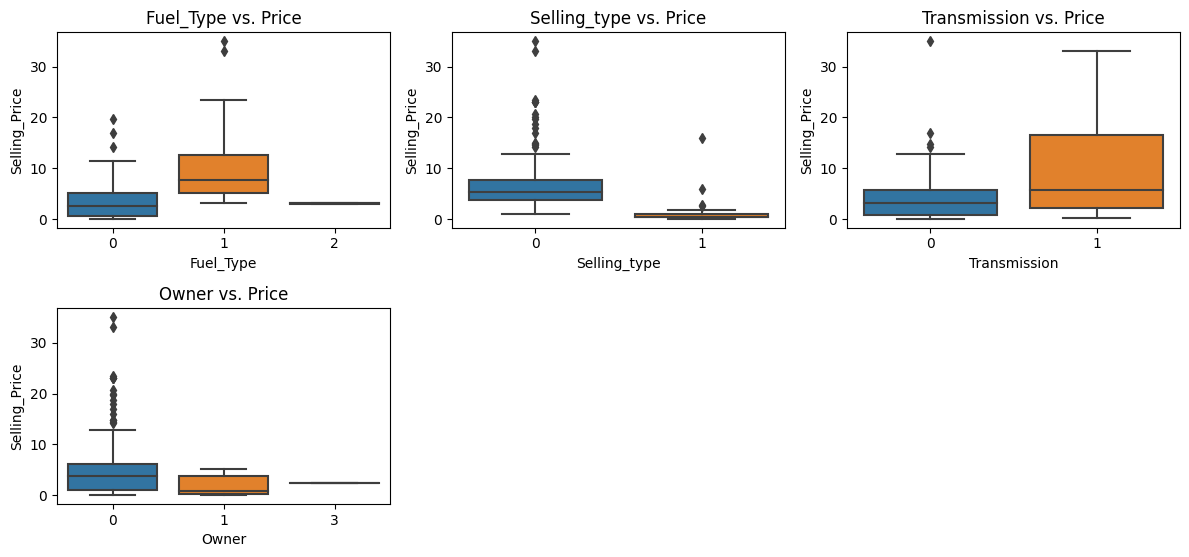

In [ ]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

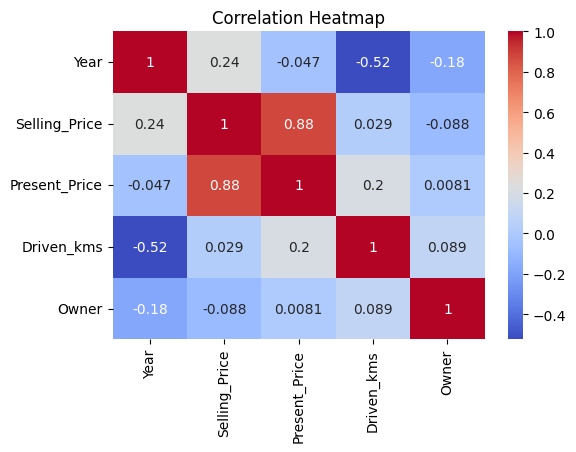

In [ ]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Models**

 **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training
model = LinearRegression()
model.fit(X_train, Y_train)

# Step 2: Evaluate the model
Y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 2.94
R-squared (R2): 0.84


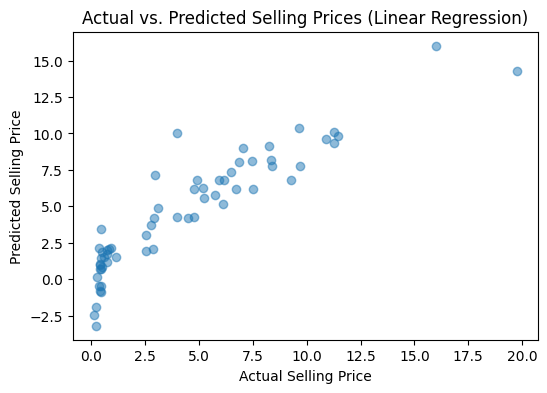

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()


In [ ]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
99,9.65,10.395048,-0.745048
161,0.45,0.712537,-0.262537
89,4.75,4.263212,0.486788
30,3.10,4.897861,-1.797861
232,11.45,9.844444,1.605556
...,...,...,...
172,0.40,0.684659,-0.284659
94,4.00,10.030344,-6.030344
160,0.45,-0.465380,0.915380
199,0.12,-2.427483,2.547483


 **Random Forest Regressor**

Random Forest Mean Squared Error (MSE): 0.74
Random Forest R-squared (R2): 0.96


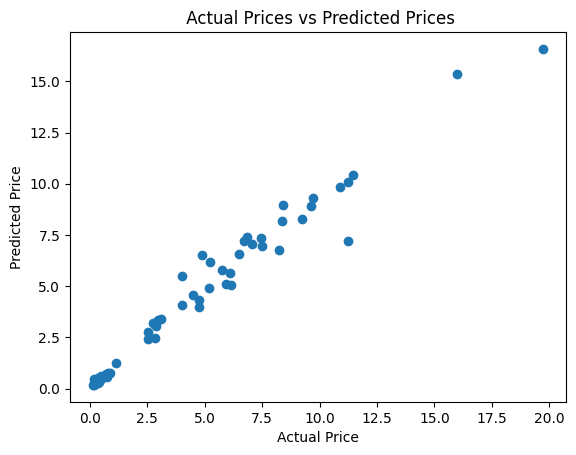

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(Y_test, rf_Y_pred)
rf_r2 = r2_score(Y_test, rf_Y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

plt.scatter(Y_test, rf_Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

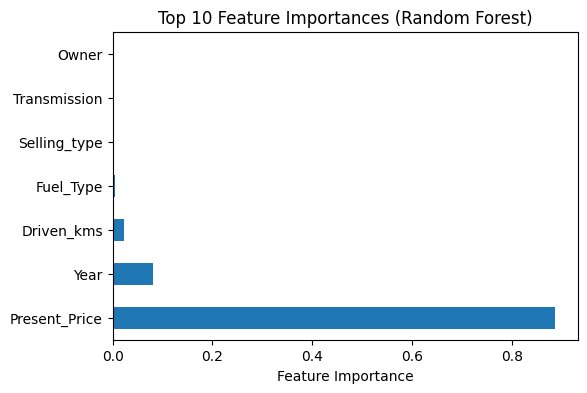

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

 **Lasso Regression**

R squared Error :  0.8432138799266458
Lasso Regression Mean Squared Error (MSE): 4.33


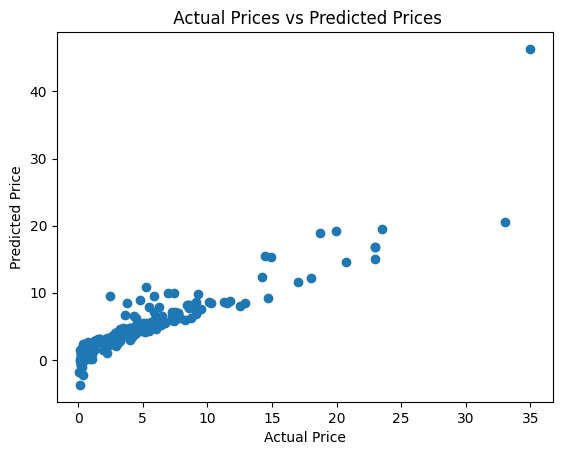

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics

# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

#Model Evaluation

# prediction on Training data
lass_reg_prediction = lass_reg_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(Y_train, lass_reg_prediction)
print("R squared Error : ", error_score)
lass_reg_mse = mean_squared_error(Y_train, lass_reg_prediction)
print(f"Lasso Regression Mean Squared Error (MSE): {lass_reg_mse:.2f}")

plt.scatter(Y_train, lass_reg_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

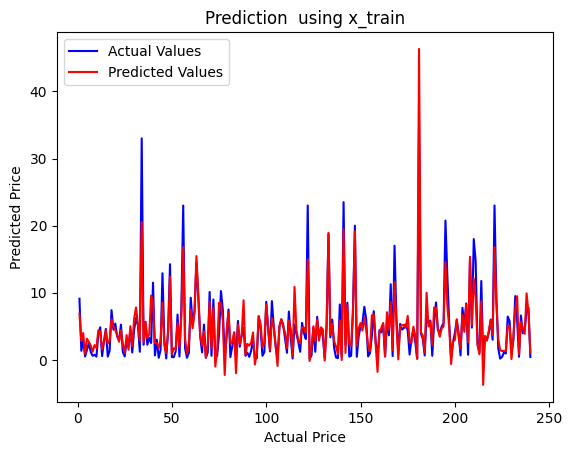

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(Y_train)+1,1)]
plt.plot(c,Y_train,color='b',linestyle='-',label="Actual Values")
plt.plot(c,lass_reg_prediction ,color='r',linestyle='-',label="Predicted Values")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction  using x_train')
plt.legend()
plt.show()

In [ ]:
# prediction on Test data
lass_reg_prediction_test = lass_reg_model.predict(X_test)

# R squared Error
error_score_test = metrics.r2_score(Y_test, lass_reg_prediction_test)
print("R squared Error : ", error_score_test)
lass_reg_mse_test = mean_squared_error(Y_test, lass_reg_prediction_test)
print(f"Lasso Regression Mean Squared Error (MSE): {lass_reg_mse_test:.2f}")

R squared Error :  0.8497230266019153
Lasso Regression Mean Squared Error (MSE): 2.76


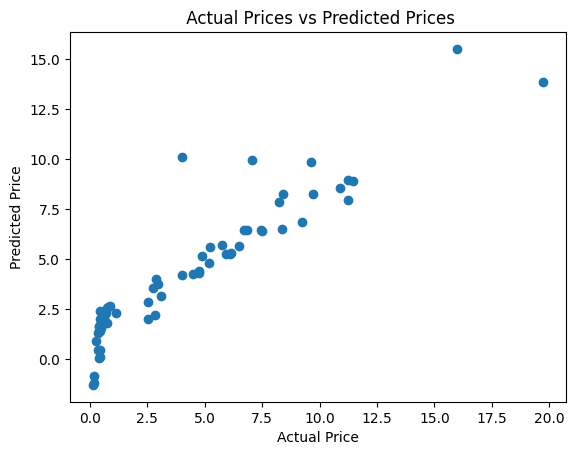

In [ ]:
plt.scatter(Y_test, lass_reg_prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# **Model Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
((240, 5), (240,), (61, 5), (61,))
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
res = pd.DataFrame()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models = [lr,tree,rf,gb,xgb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,Y_train)
    print('Training score : {}'.format(m.score(X_train,Y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))

    r2score = r2_score(Y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(Y_test,prediction)
    mse = mean_squared_error(Y_test,prediction)
    rmse = np.sqrt(mean_squared_error(Y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.8836563703329281
Predictions are : [ 2.96562958  8.30085782  6.05782751 -1.46736816  9.25705687  7.03171029
  1.35032876  0.82691573  1.36987479  7.10758777  8.74146173  0.58642748
  8.50459253  3.42661966  6.50292735  3.08732011  0.46492161 10.89305942
  1.76225878  2.36483065  0.37623881  7.73151022  6.20981391  2.65038024
  0.78195056  3.72251099  5.3340761   2.84078903  2.15815992  1.77018609
  0.37934652  8.79022344 -0.69755203  2.30364091  8.21352459  4.54034656
  7.35264949  7.68532992  2.91820641  8.08316508  4.00325157  4.35384555
  4.36428366  0.60942277  6.94443091  0.47315352  7.41534765 11.442946
  3.14938081  4.95296902  6.86419835  2.19604944 20.53785454 16.78959932
  7.13843807  9.82975063  4.49877206  8.61930717  1.81754614  7.67258754
  0.21141592]
R2 score is : 0.8466902419663465
MAE : 1.2219323621754923
MSE : 3.531579888969474
RMSE : 1.8792498207980421
           Model Name  R2 score       MAE      MSE     RMSE
0  Line

# **Model Comparison**

In [ ]:

models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.964072,0.563485,0.827617,0.909735
2,RandomForestRegressor,0.962159,0.614323,0.871691,0.933644
4,XGBRegressor,0.957868,0.624453,0.970525,0.985152
1,DecisionTreeRegressor,0.908965,0.871967,2.097044,1.448117
0,LinearRegression,0.846690,1.221932,3.531580,1.879250


In [ ]:
#Trainning data with GradientBoostingRegressor

gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':Y_test,'Price_pred':y_pred})
df_copy = df.copy()
res = df_copy.merge(out,left_index=True,right_index=True)
res.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_actual,Price_pred
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0,9.25,8.361686
7,s cross,2015,6.50,8.61,33429,1,0,0,0,6.50,7.245485
9,ciaz,2015,7.45,8.92,42367,1,0,0,0,7.45,6.913168
17,ertiga,2016,7.75,10.79,43000,1,0,0,0,7.75,7.739447
24,wagon r,2013,2.90,4.41,56879,0,0,0,0,2.90,2.543687
25,swift,2011,3.00,4.99,20000,0,0,0,0,3.00,2.624658
33,ertiga,2014,6.00,9.95,45000,1,0,0,0,6.00,6.640564
42,sx4,2008,1.95,7.15,58000,0,0,0,0,1.95,2.949388
45,ciaz,2014,7.50,12.04,15000,0,0,1,0,7.50,7.235528
46,ritz,2013,2.65,4.89,64532,0,0,0,0,2.65,2.233595


# **Conclusions:**



*  Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
*  Car age is effecting negatively as older the car lesser the Selling Price.
*  Selling Price of cars with Fuel type Diesel is higher.
*  Car of Manual type is of less priced whereas of Automatic type is high.
*  Cars sold by Individual tend to get less Selling Price when sold by Dealers.






